# Customer Service Requests Analysis

## Step 1:
### Identify Problem:
##### NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

#### Problem Objective :
##### Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.

#### Domain:
Customer Service
Analysis Tasks to be performed:
##### (Perform a service request data analysis of New York City 311 calls)

Import a 311 NYC service request.

Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

Perform a statistical test for the following:

Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

Whether the average response time across complaint types is similar or not (overall)
Are the type of complaint or service requested and location related?

## Step 2: Data Acquisition

In [2]:
#Importing Required Libraries for Data Analysis
import numpy as np
import pandas as pd

In [3]:
#Reading the Service Request Data csv
SRD_raw = pd.read_csv("C:\\Users\\grkum\\Downloads\\Data-Science-with-Python-Project-2--master\\Data Science with Python Two\\311_Service_Requests_from_2010_to_Present.csv")

c:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (48,49) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
#Checking the first 5 entries of Data
SRD_raw.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [5]:
#Identify features of the dataset(Columns)
SRD_raw.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'School or Citywide Complaint',
       'Vehicle Type', 'Taxi Company Borough', 'Taxi Pick Up Location',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Garage Lot Name', 'Ferry 

In [6]:
#View the data(observations),shape,info,describe to get more insights on the data.
SRD_raw.shape

(300698, 53)

In [7]:
SRD_raw.describe()

,Unique Key,Incident Zip,X Coordinate (State Plane),Y Coordinate (State Plane),School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Garage Lot Name,Latitude,Longitude
count,3.006980e+05,298083.000000,2.971580e+05,297158.000000,0.0,0.0,0.0,0.0,0.0,297158.000000,297158.000000
mean,3.130054e+07,10848.888645,1.004854e+06,203754.534416,NaN,NaN,NaN,NaN,NaN,40.725885,-73.925630
std,5.738547e+05,583.182081,2.175338e+04,29880.183529,NaN,NaN,NaN,NaN,NaN,0.082012,0.078454
min,3.027948e+07,83.000000,9.133570e+05,121219.000000,NaN,NaN,NaN,NaN,NaN,40.499135,-74.254937
25%,3.080118e+07,10310.000000,9.919752e+05,183343.000000,NaN,NaN,NaN,NaN,NaN,40.669796,-73.972142
50%,3.130436e+07,11208.000000,1.003158e+06,201110.500000,NaN,NaN,NaN,NaN,NaN,40.718661,-73.931781
75%,3.178446e+07,11238.000000,1.018372e+06,224125.250000,NaN,NaN,NaN,NaN,NaN,40.781840,-73.876805
max,3.231065e+07,11697.000000,1.067173e+06,271876.000000,NaN,NaN,NaN,NaN,NaN,40.912869,-73.700760


In [8]:
SRD_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [9]:
# Using the option to view all columns of the dataset and view the data for any 6 random entries.

pd.set_option('display.max_columns',None)
SRD_raw.sample(6)

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,School Name,School Number,School Region,School Code,School Phone Number,School Address,School City,School State,School Zip,School Not Found,School or Citywide Complaint,Vehicle Type,Taxi Company Borough,Taxi Pick Up Location,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
192285,31017056,07-06-15 23:19,07-07-15 10:29,NYPD,New York City Police Department,Illegal Parking,Blocked Hydrant,Street/Sidewalk,10471.0,5497 FIELDSTON ROAD,FIELDSTON ROAD,BEND,WEST 256 STREET,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,07-07-15 7:19,The Police Department responded and upon arriv...,07-07-15 10:29,08 BRONX,BRONX,1011725.0,268523.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.903664,-73.900609,"(40.90366430509356, -73.90060907415345)"
212569,30887425,06/20/2015 01:10:00 AM,06/20/2015 02:38:20 AM,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10030.0,NaN,NaN,NaN,NaN,ADAM CLAYTON POWELL BOULEVARD,WEST 144 STREET,INTERSECTION,NEW YORK,NaN,Precinct,Closed,06/20/2015 09:10:00 AM,The Police Department responded to the complai...,06/20/2015 02:38:20 AM,10 MANHATTAN,MANHATTAN,1000977.0,238383.0,Unspecified,MANHATTAN,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.820966,-73.939565,"(40.820966053537745, -73.93956521485524)"
25672,32138169,12-05-15 23:13,12-06-15 7:18,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,10301.0,100 BELMONT PLACE,BELMONT PLACE,WALL STREET,FORT PLACE,NaN,NaN,ADDRESS,STATEN ISLAND,NaN,Precinct,Closed,12-06-15 7:13,The Police Department responded to the complai...,12-06-15 7:18,01 STATEN ISLAND,STATEN ISLAND,962153.0,173398.0,Unspecified,STATEN ISLAND,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.642587,-74.079623,"(40.64258651270711, -74.07962321070099)"
121102,31480197,09-08-15 0:32,09-08-15 0:59,NYPD,New York City Police Department,Noise - Commercial,Loud Talking,Store/Commercial,10472.0,1207 BEACH AVENUE,BEACH AVENUE,GLEASON AVENUE,WESTCHESTER AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,09-08-15 8:32,The Police Department responded to the complai...,09-08-15 0:59,09 BRONX,BRONX,1021327.0,241829.0,Unspecified,BRONX,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.830362,-73.866022,"(40.83036235589997, -73.86602154214397)"
137280,31388339,08/25/2015 08:50:58 AM,08/25/2015 10:19:14 AM,NYPD,New York City Police Department,Illegal Parking,Posted Parking Sign Violation,Street/Sidewalk,11416.0,97-44 105 STREET,105 STREET,97 AVENUE,101 AVENUE,NaN,NaN,ADDRESS,OZONE PARK,NaN,Precinct,Closed,08/25/2015 04:50:58 PM,The Police Department responded to the complai...,08/25/2015 10:19:14 AM,09 QUEENS,QUEENS,1028940.0,189937.0,Unspecified,QUEENS,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,Unspecified,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.687897,-73.838857,"(40.68789713504089, -73.83885682263217)"
128265,31450619,09-02-15 2:50,09-02-15 15:20,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Talk

### Step 3: Data Wrangling

From above step we understood each feature(column) one by one. If the feature contains all Nun or all same entries or maybe, all different entries, then we will omit such columns, since these columns do not contain information that is statistically meaningful or can give us any trend.

For instance, the 'Unique Key' column has a different number for each entry whereas columns like 'Descriptor', 'Complaint Type' have a different group of lists from which we can predict which kind of complaint occurs more often (e.g frequency distribution). So we can improve our future prediction and even can take some precautions (if permissible).

In [10]:

#Converting the columns as an array and then convert to a list using the method tolist() method
column_names=SRD_raw.columns.values.tolist()

#Observing Frequency of each feature
for SRD in range(len(column_names)):
   name = column_names[SRD]
   print(SRD_raw[name].value_counts(),"\n--------------------------\n")

32310363    1
30964902    1
30963768    1
30961544    1
30964777    1
           ..
31611925    1
31615926    1
31612695    1
31617117    1
30281825    1
Name: Unique Key, Length: 300698, dtype: int64 
--------------------------

07-11-15 23:04            9
11-06-15 23:34            9
06-06-15 22:23            9
10-09-15 23:56            8
11-01-15 22:12            8
                         ..
09/22/2015 05:52:17 PM    1
09/22/2015 05:50:43 PM    1
09/22/2015 05:49:55 PM    1
09/22/2015 05:49:47 PM    1
03/29/2015 12:33:01 AM    1
Name: Created Date, Length: 259493, dtype: int64 
--------------------------

11-08-15 7:34             24
10-11-15 7:03             22
12-08-15 7:44             18
05-10-15 7:01             18
12-07-15 23:17            17
                          ..
09/21/2015 11:03:55 AM     1
09/21/2015 08:52:27 AM     1
09/21/2015 09:13:15 AM     1
09/21/2015 08:26:57 AM     1
03/29/2015 04:41:50 AM     1
Name: Closed Date, Length: 237165, dtype: int64 
----------------

In [11]:
#Dropping unwanted columns and making a copy of it

SRD_mod = SRD_raw.drop(columns=['Unique Key','School Name', 'School Number', 'School Region', 'School Code','School Phone Number',
                                  'School Address', 'School City', 'School State','School Zip', 'School Not Found', 
                                  'School or Citywide Complaint','Vehicle Type','Taxi Company Borough','Taxi Pick Up Location',
                                  'Garage Lot Name','Ferry Direction','Ferry Terminal Name'],axis=1)


In [12]:
#View the Shape of data after dropping columns
SRD_mod.shape

(300698, 35)

In [13]:
#View the data after cleansing
SRD_mod.columns

Index(['Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'Bridge Highway Name', 'Bridge Highway Direction', 'Road Ramp',
       'Bridge Highway Segment', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [14]:
SRD_mod.sample(3)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location
262234,05-08-15 16:21,05-08-15 22:47,NYPD,New York City Police Department,Homeless Encampment,NaN,Street/Sidewalk,10035.0,NaN,NaN,NaN,NaN,EAST 125 STREET,PARK AVENUE,INTERSECTION,NEW YORK,NaN,Precinct,Closed,05-09-15 0:21,The Police Department responded to the complai...,05-08-15 22:47,11 MANHATTAN,MANHATTAN,1001128.0,232587.0,Unspecified,MANHATTAN,NaN,NaN,NaN,NaN,40.805057,-73.939034,"(40.80505736609213, -73.93903422529588)"
208608,06/23/2015 05:25:52 AM,06/23/2015 07:28:37 AM,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10460.0,1775 MANSION STREET,MANSION STREET,COMMONWEALTH AVENUE,ST LAWRENCE AVENUE,NaN,NaN,ADDRESS,BRONX,NaN,Precinct,Closed,06/23/2015 01:25:52 PM,The Police Department responded and upon arriv...,06/23/2015 07:28:37 AM,09 BRONX,BRONX,1020633.0,244617.0,Unspecified,BRONX,NaN,NaN,NaN,NaN,40.838017,-73.868514,"(40.83801748926013, -73.86851419871526)"
150463,08/13/2015 02:26:19 PM,08/13/2015 09:17:33 PM,NYPD,New York City Police Department,Blocked Driveway,Partial Access,Street/Sidewalk,11369.0,23-37 101 STREET,101 STREET,BEND,24 AVENUE,NaN,NaN,ADDRESS,EAST ELMHURST,NaN,Precinct,Closed,08/13/2015 10:26:19 PM,The Police Department issued a summons in resp...,08/13/2015 09:17:33 PM,03 QUEENS,QUEENS,1020417.0,219089.0,Unspecified,QUEENS,NaN,NaN,NaN,NaN,40.767951,-73.869432,"(40.76795110259659, -73.86943232002517)"


In [15]:
SRD_mod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Created Date                    300698 non-null  object 
 1   Closed Date                     298534 non-null  object 
 2   Agency                          300698 non-null  object 
 3   Agency Name                     300698 non-null  object 
 4   Complaint Type                  300698 non-null  object 
 5   Descriptor                      294784 non-null  object 
 6   Location Type                   300567 non-null  object 
 7   Incident Zip                    298083 non-null  float64
 8   Incident Address                256288 non-null  object 
 9   Street Name                     256288 non-null  object 
 10  Cross Street 1                  251419 non-null  object 
 11  Cross Street 2                  250919 non-null  object 
 12  Intersection Str

Query 1: 
Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing

In [16]:
#importing datetime library to perform above operation
import datetime

In [17]:
SRD_mod["Created Date"] = pd.to_datetime(SRD_mod["Created Date"])
SRD_mod["Closed Date"] = pd.to_datetime(SRD_mod["Closed Date"])
SRD_mod["Request_Closing_Time"] = SRD_mod["Closed Date"] - SRD_mod["Created Date"]
SRD_mod['Request_Closing_Time_mins'] = SRD_mod['Request_Closing_Time']/np.timedelta64(1,'m')
print(SRD_mod["Request_Closing_Time"].head())
print("----------------------------")
print(SRD_mod['Request_Closing_Time_mins'].head(3))

0   0 days 00:55:15
1   0 days 01:26:16
2   0 days 04:51:31
3   0 days 07:45:14
4   0 days 03:27:02
Name: Request_Closing_Time, dtype: timedelta64[ns]
----------------------------
0     55.250000
1     86.266667
2    291.516667
Name: Request_Closing_Time_mins, dtype: float64


In [18]:
SRD_mod.shape

(300698, 37)

In [19]:
SRD_mod.sample(2)

,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,Street Name,Cross Street 1,Cross Street 2,Intersection Street 1,Intersection Street 2,Address Type,City,Landmark,Facility Type,Status,Due Date,Resolution Description,Resolution Action Updated Date,Community Board,Borough,X Coordinate (State Plane),Y Coordinate (State Plane),Park Facility Name,Park Borough,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Latitude,Longitude,Location,Request_Closing_Time,Request_Closing_Time_mins
270022,2015-05-01 22:12:00,2015-05-02 01:50:00,NYPD,New York City Police Department,Noise - Commercial,Loud Music/Party,Club/Bar/Restaurant,11237.0,170 KNICKERBOCKER AVENUE,KNICKERBOCKER AVENUE,MELROSE STREET,JEFFERSON STREET,NaN,NaN,ADDRESS,BROOKLYN,NaN,Precinct,Closed,05-02-15 6:12,The Police Department responded to the complai...,05-02-15 1:50,04 BROOKLYN,BROOKLYN,1004354.0,195769.0,Unspecified,BROOKLYN,NaN,NaN,NaN,NaN,40.703995,-73.927492,"(40.7039946081822, -73.92749153590619)",0 days 03:38:00,218.0
28175,2015-12-03 15:07:00,2015-12-03 22:49:00,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11377.0,65-28 38 AVENUE,38 AVENUE,65 STREET,69 STREET,NaN,NaN,ADDRESS,WOODSIDE,NaN,Precinct,Closed,12-03-15 23:07,The Police Department responded to the complai...,12-03-15 22:49,02 QUEENS,QUEENS,1012601.0,211429.0,Unspecified,QUEENS,NaN,NaN,NaN,NaN,40.746955,-73.897681,"(40.74695489385038, -73.8976813912942)",0 days 07:42:00,462.0


#### 3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining

### Step 4: Exploratory Data Analysis and Data Exploration

In [20]:
#importing the libraries necessary for above step
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns   
%matplotlib inline

In [21]:
# Measuring the frequency (occurence) of the different complaint

SRD_complaint = SRD_mod['Complaint Type'].value_counts()
SRD_complaint = SRD_complaint.to_frame()
SRD_complaint = SRD_complaint.rename(columns={'Complaint Type':'Counts'})
SRD_complaint

,Counts
Blocked Driveway,77044
Illegal Parking,75361
Noise - Street/Sidewalk,48612
Noise - Commercial,35577
Derelict Vehicle,17718
Noise - Vehicle,17083
Animal Abuse,7778
Traffic,4498
Homeless Encampment,4416
Noise - Park,4042


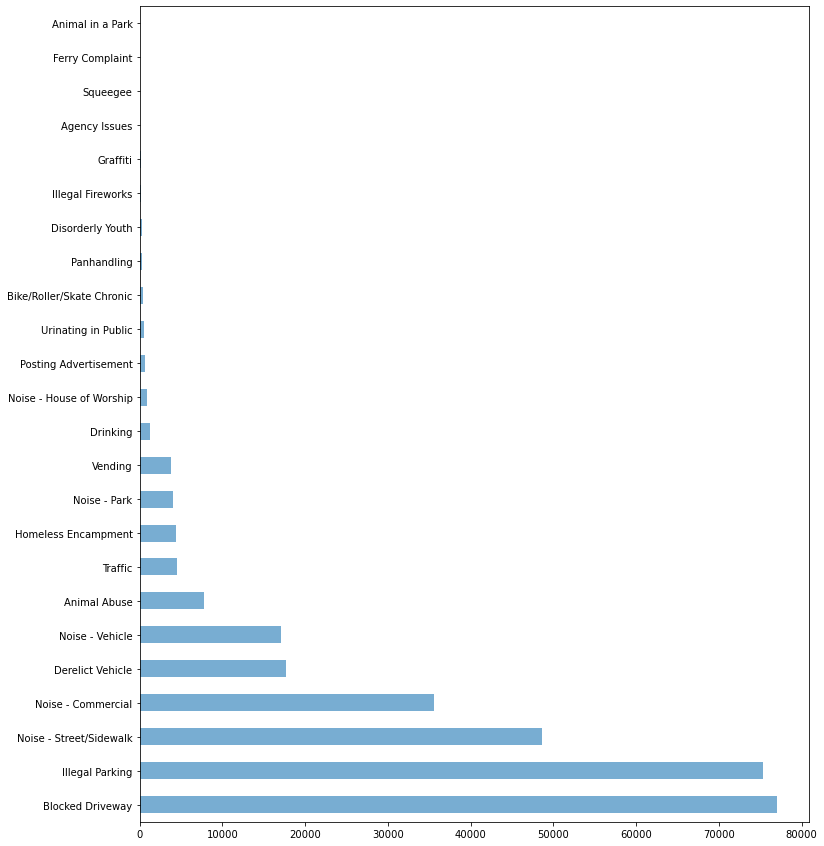

In [22]:
SRD_mod['Complaint Type'].value_counts().plot(kind='barh',alpha=0.6, figsize=(12,15))
plt.show()

In [23]:
#Lets evaluate above in percentage for clear picture

SRD_complaint['Percentage'] = np.around((SRD_complaint.Counts/SRD_complaint.Counts.sum())*100,decimals=2)
#Sorting the Complaint feature based on percentage values
SRD_complaint.sort_values("Percentage")
print("First five observations \n",SRD_complaint.head(5))
print("----------------------------")
print("last five observations \n",SRD_complaint.tail(5))



First five observations 
                          Counts  Percentage
Blocked Driveway          77044       25.62
Illegal Parking           75361       25.06
Noise - Street/Sidewalk   48612       16.17
Noise - Commercial        35577       11.83
Derelict Vehicle          17718        5.89
----------------------------
last five observations 
                   Counts  Percentage
Graffiti             113        0.04
Agency Issues          6        0.00
Squeegee               4        0.00
Ferry Complaint        2        0.00
Animal in a Park       1        0.00


In [24]:
# Keeping the complaint types >1.0 percentage ---------------

print("Before sorting \n",SRD_complaint.shape)
SRD_complaint = SRD_complaint[SRD_complaint.Percentage>1.0]
print("After  sorting \n",SRD_complaint.shape)


Before sorting 
 (24, 2)
After  sorting 
 (11, 2)


In [25]:
print("Before re-indexing \n",SRD_complaint)
SRD_complaint = SRD_complaint.reset_index()
SRD_complaint = SRD_complaint.rename(columns={'index':'Complaint Type'})
print("After re-indexing \n",SRD_complaint)

Before re-indexing 
                          Counts  Percentage
Blocked Driveway          77044       25.62
Illegal Parking           75361       25.06
Noise - Street/Sidewalk   48612       16.17
Noise - Commercial        35577       11.83
Derelict Vehicle          17718        5.89
Noise - Vehicle           17083        5.68
Animal Abuse               7778        2.59
Traffic                    4498        1.50
Homeless Encampment        4416        1.47
Noise - Park               4042        1.34
Vending                    3802        1.26
After re-indexing 
              Complaint Type  Counts  Percentage
0          Blocked Driveway   77044       25.62
1           Illegal Parking   75361       25.06
2   Noise - Street/Sidewalk   48612       16.17
3        Noise - Commercial   35577       11.83
4          Derelict Vehicle   17718        5.89
5           Noise - Vehicle   17083        5.68
6              Animal Abuse    7778        2.59
7                   Traffic    4498        1.50

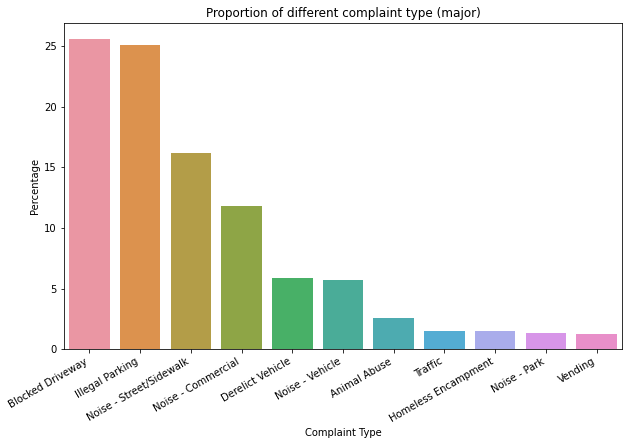

<Figure size 432x288 with 0 Axes>

In [26]:
# Visualization of the above evaluated dataset 
plt.figure(figsize=(10,6))
SRD_complaint_barplot = sns.barplot(x=SRD_complaint['Complaint Type'],y=SRD_complaint.Percentage,data=SRD_complaint)
SRD_complaint_barplot.set_xticklabels(SRD_complaint_barplot.get_xticklabels(), rotation=30, ha="right")
plt.title('Proportion of different complaint type (major)')
plt.show()
plt.tight_layout()

From the above data (Counts and Percentage), it is clear that main complaint comes from 'Blocked Driveway', 'Illegal Parking' and noise from Street/Sidewalk or Commercial. 
However, it is alluring to represent such results via visualization. And it is easy to realise the facts also. 
Now, we will do the same for several features.

In [27]:
# Applying the above procedure for Descriptor

SRD_descriptor = np.around(((SRD_mod['Descriptor'].value_counts()*100) / SRD_mod['Descriptor'].value_counts().sum()),decimals=2)
SRD_descriptor = SRD_descriptor.to_frame()
SRD_descriptor = SRD_descriptor.rename(columns={'Descriptor':'Percentage'})
SRD_descriptor['Descriptor'] = SRD_descriptor.index
cols = SRD_descriptor.columns.tolist()
cols = cols[-1:]+cols[:-1]
SRD_descriptor = SRD_descriptor[cols]
SRD_descriptor = SRD_descriptor[(SRD_descriptor.Percentage) >= 2.0]
SRD_descriptor = SRD_descriptor.reset_index()
SRD_descriptor = SRD_descriptor.drop(columns=['index'],axis=1)
SRD_descriptor



,Descriptor,Percentage
0,Loud Music/Party,20.84
1,No Access,19.33
2,Posted Parking Sign Violation,7.61
3,Loud Talking,7.32
4,Partial Access,6.81
5,With License Plate,6.01
6,Blocked Hydrant,5.46
7,Commercial Overnight Parking,4.13
8,Car/Truck Music,3.82
9,Blocked Sidewalk,3.77


In [28]:
# Applying the above procedure for Location Type
SRD_location = np.around((SRD_mod["Location Type"].value_counts()*100)/SRD_mod["Location Type"].value_counts().sum(),decimals=2)
SRD_location = SRD_location.to_frame()
SRD_location = SRD_location.rename(columns={"Location Type":"Percentage"})
SRD_location = SRD_location.reset_index()
SRD_location = SRD_location.rename(columns={'index':'Location Type'})
SRD_location = SRD_location[(SRD_location.Percentage) >= 0.1]
SRD_location

,Location Type,Percentage
0,Street/Sidewalk,82.94
1,Store/Commercial,6.78
2,Club/Bar/Restaurant,5.78
3,Residential Building/House,2.32
4,Park/Playground,1.59
5,House of Worship,0.31


In [29]:
# Applying the above procedure for City
SRD_City = np.around((SRD_mod["City"].value_counts()*100 / SRD_mod["City"].value_counts().sum()),decimals=2)
SRD_City = SRD_City.to_frame()
SRD_City = SRD_City.rename(columns={"City":"Percentage"})
SRD_City = SRD_City.reset_index()
SRD_City = SRD_City.rename(columns={"index":"City"})
SRD_City = SRD_City[(SRD_City.Percentage) >= 1.0]
SRD_City

,City,Percentage
0,BROOKLYN,32.98
1,NEW YORK,22.14
2,BRONX,13.65
3,STATEN ISLAND,4.14
4,JAMAICA,2.45
5,ASTORIA,2.12
6,FLUSHING,2.00
7,RIDGEWOOD,1.73
8,CORONA,1.44
9,WOODSIDE,1.19


In [30]:
# Applying the above procedure for Address Type
SRD_Address = np.around((SRD_mod["Address Type"].value_counts()*100 / SRD_mod["Address Type"].value_counts().sum()),decimals=2)
SRD_Address = SRD_Address.to_frame()
SRD_Address = SRD_Address.rename(columns={"Address Type":"Percentage"})
SRD_Address = SRD_Address.reset_index()
SRD_Address = SRD_Address.rename(columns={"index":"Address Type"})
SRD_Address = SRD_Address[(SRD_Address.Percentage) >= 1.0 ]
SRD_Address.head()

,Address Type,Percentage
0,ADDRESS,80.11
1,INTERSECTION,14.56
2,BLOCKFACE,4.03
3,LATLONG,1.18


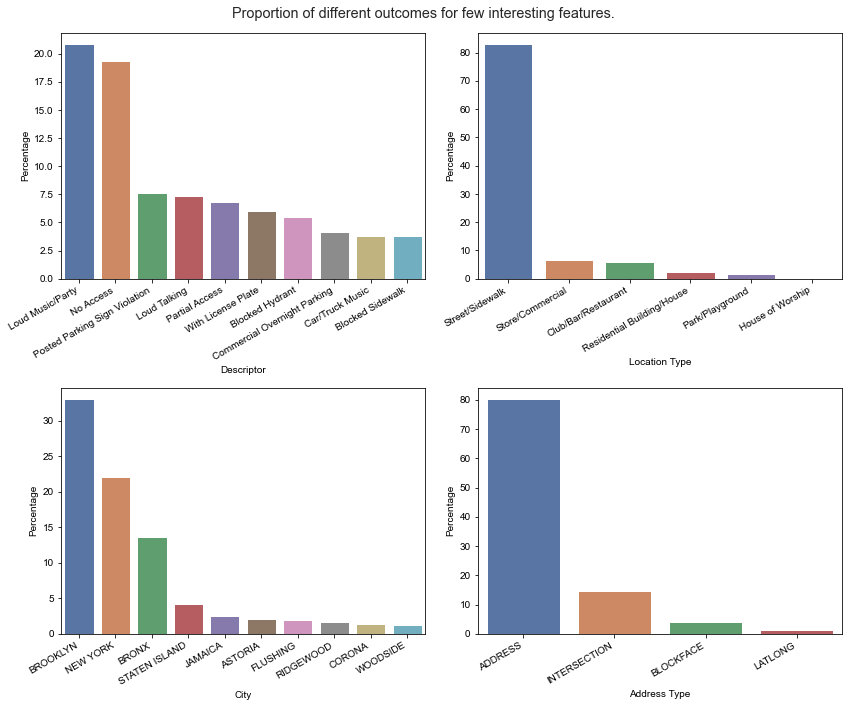

In [31]:
fig,ax = plt.subplots(2, 2, figsize=(12, 10))

sns.set_theme(style="whitegrid")
plt.suptitle("Proportion of different outcomes for few interesting features.")

descriptor = sns.barplot(ax=ax[0,0],x=SRD_descriptor["Descriptor"],y=SRD_descriptor.Percentage,)
descriptor.set_xticklabels(descriptor.get_xticklabels(), rotation=30, ha="right")

location_type = sns.barplot(ax=ax[0,1],x=SRD_location['Location Type'],y=SRD_location.Percentage,)
location_type.set_xticklabels(location_type.get_xticklabels(), rotation=30, ha="right")

city = sns.barplot(ax=ax[1,0],x=SRD_City['City'],y=SRD_City.Percentage,)
city.set_xticklabels(city.get_xticklabels(), rotation=30, ha="right")

address = sns.barplot(ax=ax[1,1],x=SRD_Address['Address Type'],y=SRD_Address.Percentage,)
address.set_xticklabels(address.get_xticklabels(), rotation=30, ha="right")

plt.tight_layout()

So it is obvious that the Loud Music/party causes the biggest problem for the citizens. And it seems most complaints occur at Street/Sidewalk. And 'Brooklyn' faces the largest problems among all other cities. However, we have mostly solid information.  The place where the problem occurs is pinpointed (Proper Address)

These observations are very preliminary. One can expect or guess the outcomes from these visualizations, regarding the corresponding features. However, it needs to be realized that we can not infer/predict from here without any proper statistical explanation.

Now, let's convert the time data ('timedelta64') into integer and store them (converting into hours) in a new column. Besides that let us cut the ambiguous data.

In [32]:
#Creating a new Dataframe with needed features
data_place_CType_RCTime = SRD_mod[['City','Complaint Type','Request_Closing_Time']]
print("Null values in the new data set were : \n",data_place_CType_RCTime.isnull().sum())
data_place_CType_RCTime.dropna(subset = ['City','Complaint Type','Request_Closing_Time'], inplace = True)
print("Verifying Null values in the new data set were : \n",data_place_CType_RCTime.isnull().sum())




Null values in the new data set were : 
 City                    2614
Complaint Type             0
Request_Closing_Time    2164
dtype: int64
Verifying Null values in the new data set were : 
 City                    0
Complaint Type          0
Request_Closing_Time    0
dtype: int64


c:\ProgramData\Anaconda3\lib\site-packages\pandas\util\_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [33]:
""" Converting time data to integer and storing them as hour - Method 1 using lambda
data_place_CType_RCTime['DeltaT(in_hr.)'] = np.around( (data_place_CType_RCTime.Request_Closing_Time.apply(lambda x: pd.Timedelta(x).total_seconds() \ 
                           / 3600.0 ) ), decimals=2)
data_place_CType_RCTime['DeltaT(in_hr.)'] """


" Converting time data to integer and storing them as hour - Method 1 using lambda\ndata_place_CType_RCTime['DeltaT(in_hr.)'] = np.around( (data_place_CType_RCTime.Request_Closing_Time.apply(lambda x: pd.Timedelta(x).total_seconds() \\ \n                           / 3600.0 ) ), decimals=2)\ndata_place_CType_RCTime['DeltaT(in_hr.)'] "

In [34]:
#Method 2- Casting DeltaT type to Interger using astype and then dividing by 10 pow 9 to get the sec. Later dividing by 3600 to get hours.
data_place_CType_RCTime['DeltaT(in_hr.)'] = np.around( (data_place_CType_RCTime['Request_Closing_Time'].astype(np.int64)/
                                                      (pow(10,9)*3600) ), decimals=2)


C:\Users\grkum\AppData\Local\Temp/ipykernel_30584/186797137.py:2: FutureWarning: casting timedelta64[ns] values to int64 with .astype(...) is deprecated and will raise in a future version. Use .view(...) instead.
  data_place_CType_RCTime['DeltaT(in_hr.)'] = np.around( (data_place_CType_RCTime['Request_Closing_Time'].astype(np.int64)/
C:\Users\grkum\AppData\Local\Temp/ipykernel_30584/186797137.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_place_CType_RCTime['DeltaT(in_hr.)'] = np.around( (data_place_CType_RCTime['Request_Closing_Time'].astype(np.int64)/


In [35]:
#Check if any negative times exist or not
neg_time = data_place_CType_RCTime[data_place_CType_RCTime['DeltaT(in_hr.)'] < 0]

neg_time.head()

,City,Complaint Type,Request_Closing_Time,DeltaT(in_hr.)


In [36]:
print('The no negative time difference (Created Time > Clossing Time, which is not possible) = \n',neg_time)
#data_place_CType_RCTime['DeltaT(in sec)/Avg.'] = np.around((data_place_CType_RCTime['DeltaT(in sec)']/Average_time),decimals=1)
data_place_CType_RCTime.head(6)


The no negative time difference (Created Time > Clossing Time, which is not possible) = 
 Empty DataFrame
Columns: [City, Complaint Type, Request_Closing_Time, DeltaT(in_hr.)]
Index: []


,City,Complaint Type,Request_Closing_Time,DeltaT(in_hr.)
0,NEW YORK,Noise - Street/Sidewalk,0 days 00:55:15,0.92
1,ASTORIA,Blocked Driveway,0 days 01:26:16,1.44
2,BRONX,Blocked Driveway,0 days 04:51:31,4.86
3,BRONX,Illegal Parking,0 days 07:45:14,7.75
4,ELMHURST,Illegal Parking,0 days 03:27:02,3.45
5,BROOKLYN,Illegal Parking,0 days 01:53:30,1.89


Let us calculate some statistical parameters, in order to draw a conclusion on the solution time taken so that we can group them into different categories depending on the time interval.

In [37]:
Average_time = np.around((data_place_CType_RCTime['DeltaT(in_hr.)'].mean()),decimals=2)
print('Average time gap between logging the complaint and problem solved = ',Average_time, 'hour')
Central_val = np.around((data_place_CType_RCTime['DeltaT(in_hr.)'].median()),decimals=2)
print('Central value of the distribution = ',Central_val, 'hour')
Most_occoor = np.around((data_place_CType_RCTime['DeltaT(in_hr.)'].mode()),decimals=2)
print('Most occered value = ',Most_occoor, 'hour')
stand_dev = np.around((data_place_CType_RCTime['DeltaT(in_hr.)'].std()),decimals=2)
print('Deviation is = ',stand_dev)

Average time gap between logging the complaint and problem solved =  4.31 hour
Central value of the distribution =  2.71 hour
Most occered value =  0    0.88
dtype: float64 hour
Deviation is =  6.08


So, one can take the central value as the normal time taken to solve the problem/issue. However, as it is clear from the deviation that it spreads around 6 hr.(more than the central value) from the distribution, so it is more practical to choose average time as the normal time to solve the problem. And categorize time interval as per the codes written below. 

In [38]:
conditions = [data_place_CType_RCTime['DeltaT(in_hr.)'] <= 0.5, 
             (0.50 < data_place_CType_RCTime['DeltaT(in_hr.)']) & (data_place_CType_RCTime['DeltaT(in_hr.)'] <= 1.00),
             (1.00 < data_place_CType_RCTime['DeltaT(in_hr.)']) & (data_place_CType_RCTime['DeltaT(in_hr.)'] <= 2.00),
             (2.00 < data_place_CType_RCTime['DeltaT(in_hr.)']) & (data_place_CType_RCTime['DeltaT(in_hr.)'] <= 6.00),
             (6.00 < data_place_CType_RCTime['DeltaT(in_hr.)']) & (data_place_CType_RCTime['DeltaT(in_hr.)'] <= 10.00),
             (10.00 < data_place_CType_RCTime['DeltaT(in_hr.)'])]

choices = ['Super fast','Very fast','Fast','Normal','Slow','Super Slow']

data_place_CType_RCTime['Solution Status'] = np.select(conditions,choices)

C:\Users\grkum\AppData\Local\Temp/ipykernel_30584/3789049267.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_place_CType_RCTime['Solution Status'] = np.select(conditions,choices)


In [39]:
data_place_CType_RCTime.head(6)

,City,Complaint Type,Request_Closing_Time,DeltaT(in_hr.),Solution Status
0,NEW YORK,Noise - Street/Sidewalk,0 days 00:55:15,0.92,Very fast
1,ASTORIA,Blocked Driveway,0 days 01:26:16,1.44,Fast
2,BRONX,Blocked Driveway,0 days 04:51:31,4.86,Normal
3,BRONX,Illegal Parking,0 days 07:45:14,7.75,Slow
4,ELMHURST,Illegal Parking,0 days 03:27:02,3.45,Normal
5,BROOKLYN,Illegal Parking,0 days 01:53:30,1.89,Fast


In [40]:
data_place_CType_RCTime["Solution Status"].value_counts()

Normal        118955
Fast           58549
Slow           38068
Very fast      33459
Super Slow     24871
Super fast     24126
Name: Solution Status, dtype: int64

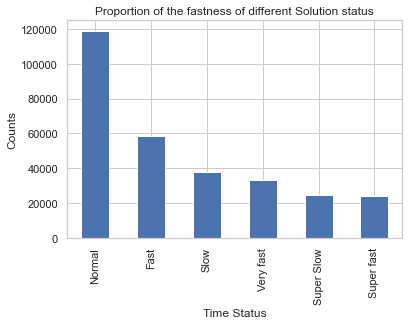

<Figure size 432x288 with 0 Axes>

In [41]:

data_place_CType_RCTime['Solution Status'].value_counts().plot(kind='bar')
plt.xlabel('Time Status')
plt.ylabel('Counts')
plt.title('Proportion of the fastness of different Solution status')
plt.show()
plt.tight_layout()


Based on the above-discussed approximation, the proportion of the time interval (expressed in different groups/status) to solve the problem, is depicted here. And it is obvious that the 'Normal' status will dominant since the range is chosen around the average value.

Now, let's see, is there any pattern for lodging a complaint?

Does it depend on a particular day or is there any month where too much or fewer problems are recorded?

In [42]:
SRD_mod['Created Date'].head(5)

0   2015-12-31 23:59:45
1   2015-12-31 23:59:44
2   2015-12-31 23:59:29
3   2015-12-31 23:57:46
4   2015-12-31 23:56:58
Name: Created Date, dtype: datetime64[ns]

In [43]:
# Creating a data frame Contain Days and Months of Complaint date 
# Importing Calender to do the operation
import calendar
Year_Month_Day = pd.to_datetime(SRD_mod['Created Date'].dt.date)
Month_Day = pd.DataFrame()
Month_Day['Date'] = pd.to_datetime(Year_Month_Day.dt.date)
Month_Day['Month'] = Year_Month_Day.dt.month
Month_Day['Day'] = Year_Month_Day.dt.day
Month_Day['Month Name'] = Month_Day['Month'].apply(lambda x: calendar.month_abbr[x])
Month_Day['Day No'] = Month_Day['Date'].dt.weekday
Month_Day['Day Name'] = Month_Day['Day No'].map({0:'Monday',1:'Tuesday',2:'Wednesday',3:'Thursday',4:'Friday',
                                                 5:'Saturday',6:'Sunday'})
Month_Day.sample(20)


,Date,Month,Day,Month Name,Day No,Day Name
23691,2015-12-07,12,7,Dec,0,Monday
52129,2015-11-09,11,9,Nov,0,Monday
255819,2015-05-13,5,13,May,2,Wednesday
166829,2015-07-29,7,29,Jul,2,Wednesday
206377,2015-06-25,6,25,Jun,3,Thursday
152650,2015-08-11,8,11,Aug,1,Tuesday
190385,2015-07-08,7,8,Jul,2,Wednesday
75839,2015-10-18,10,18,Oct,6,Sunday
64135,2015-10-29,10,29,Oct,3,Thursday
139514,2015-08-23,8,23,Aug,6,Sunday


In [44]:
Month_plot = Month_Day['Month Name'].value_counts()
Month_plot = Month_plot.to_frame()
Month_plot = Month_plot.rename(columns={'Month Name':'Counts'})
Month_plot

,Counts
May,36437
Sep,35427
Jun,35315
Aug,34956
Jul,34888
Oct,32605
Nov,30773
Dec,30521
Apr,27305
Mar,2471


In [45]:
Day_plot = Month_Day['Day Name'].value_counts()
Day_plot = Day_plot.to_frame()
Day_plot = Day_plot.rename(columns={'Day Name':'Counts'})
Day_plot

,Counts
Sunday,47969
Saturday,47564
Friday,43995
Thursday,41342
Monday,40489
Wednesday,39788
Tuesday,39551


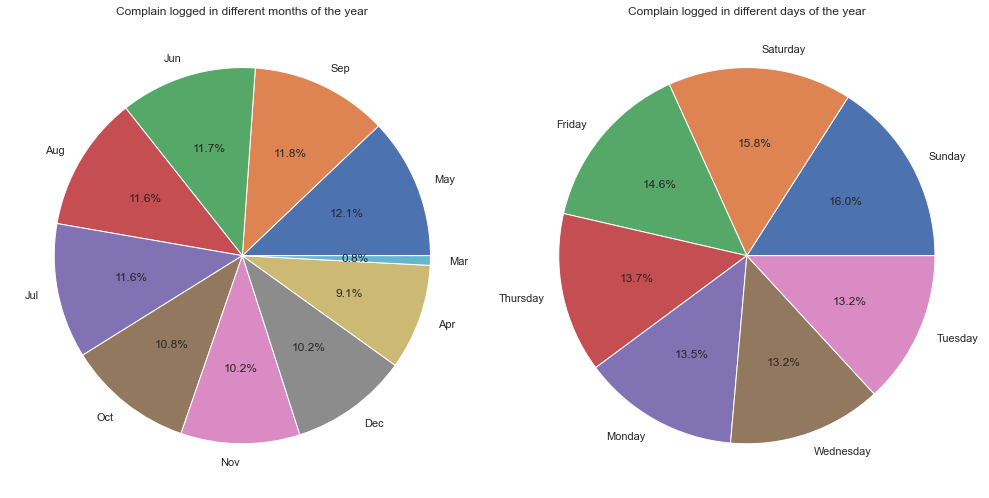

In [46]:
fig, axes = plt.subplots(1,2, figsize=(14,8))

axes[0].pie(Month_plot['Counts'], labels = Month_plot.index,autopct='%1.1f%%')
axes[0].set_title('Complain logged in different months of the year')

axes[1].pie(Day_plot['Counts'], labels = Day_plot.index,autopct='%1.1f%%')
axes[1].set_title('Complain logged in different days of the year')

plt.tight_layout()

So there is nothing abrupt for the months of lodging complaint. However, a very small amount of complaints recorded in the month of March.

The same observation can be made for the days. But if we look carefully, there is a small increment on the weekends compared to the weekly days. 

However, looking at the days of a year might hide some extra information. It is better to check the days of each month of the year.

In [47]:
Month_Day_grouped = Month_Day.groupby(['Month Name','Day Name'],as_index=False)['Day No'].count()
Month_Day_grouped_final = Month_Day_grouped.rename(columns={'Day No':'Counts'})
Month_Day_grouped_final.head(15)

,Month Name,Day Name,Counts
0,Apr,Friday,3565
1,Apr,Monday,3222
2,Apr,Saturday,4227
3,Apr,Sunday,4069
4,Apr,Thursday,4323
5,Apr,Tuesday,3586
6,Apr,Wednesday,4313
7,Aug,Friday,4684
8,Aug,Monday,5042
9,Aug,Saturday,6913


In [48]:
Month_Day[( (Month_Day['Month Name'] == 'Apr') & (Month_Day['Day Name'] == 'Monday') )].count()

Date          3222
Month         3222
Day           3222
Month Name    3222
Day No        3222
Day Name      3222
dtype: int64

This is just to check whether the grouping operation is done correctly or not.

As you can see below, complaints created in each month for all seven days of the week are plotted. As we already counter that in March there is an abrupt decrement of complaint lodging compared to the other months. And Only three days of a week contributed here. It may contain seven days of the week, but with a very lesser amount. So let's check that to as well from the numbers.

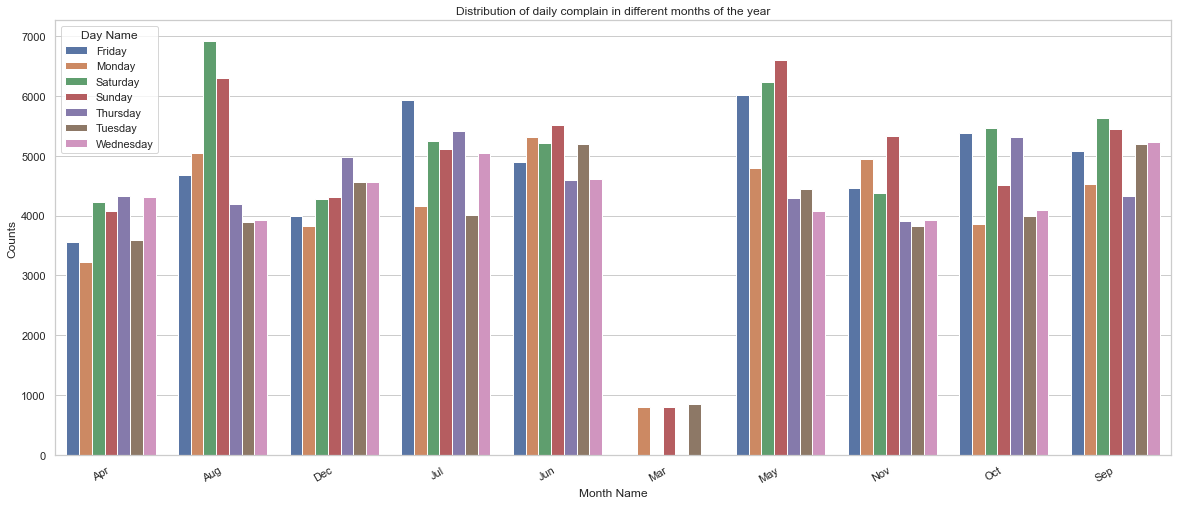

<Figure size 432x288 with 0 Axes>

In [49]:
plt.figure(figsize=(20,8))

month_day_plot = sns.barplot(x=Month_Day_grouped_final['Month Name'], y=Month_Day_grouped_final['Counts'], 
                             hue=Month_Day_grouped_final['Day Name'], data=Month_Day_grouped_final)
month_day_plot.set_xticklabels(month_day_plot.get_xticklabels(), rotation=30, ha="right")
plt.title('Distribution of daily complain in different months of the year')
plt.show()
plt.tight_layout()

In [50]:
Month_Day_grouped[Month_Day_grouped['Month Name'] == 'Mar']

,Month Name,Day Name,Day No
35,Mar,Monday,807
36,Mar,Sunday,802
37,Mar,Tuesday,862


So complaints are recorded only in these three days of March.
And let's have a look quickly at the status of the complaints.

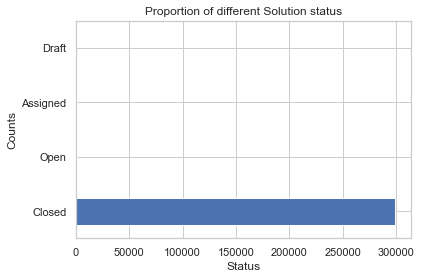

<Figure size 432x288 with 0 Axes>

In [51]:
SRD_mod['Status'].value_counts().plot(kind='barh')
plt.xlabel('Status')
plt.ylabel('Counts')
plt.title('Proportion of different Solution status')
plt.show()
plt.tight_layout()

#### 4. Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations

Ordering the complaint types based on the average ‘Request_Closing_Time’ (converted into integer and kept in column 'DeltaT(in_hr.)') and grouping them for different locations (such as 'City').

In [52]:
Complaint_City_AvgTime_grouped = data_place_CType_RCTime.groupby(['City','Complaint Type']).agg({'DeltaT(in_hr.)':'mean'})
Complaint_City_AvgTime_grouped = Complaint_City_AvgTime_grouped.rename( \
    columns={'DeltaT(in_hr.)':'Avg. Time(Given City, Complaint Type)'})
Complaint_City_AvgTime_grouped = Complaint_City_AvgTime_grouped.sort_values(
    ['City','Avg. Time(Given City, Complaint Type)'])
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
Complaint_City_AvgTime_grouped.head(10)


Avg. Time(Given City, Complaint Type)
City    Complaint Type                                                 
ARVERNE Drinking                                               0.240000
        Vending                                                0.480000
        Urinating in Public                                    0.690000
        Panhandling                                            1.030000
        Noise - Park                                           1.285000
        Graffiti                                               1.530000
        Noise - House of Worship                               1.562727
        Homeless Encampment                                    1.812500
        Noise - Vehicle                                        1.860000
        Noise - Street/Sidewalk                                1.992759

In [53]:
#Displaying data in the form of table
Complaint_City_AvgTime_grouped.unstack().fillna(0).head()

Avg. Time(Given City, Complaint Type)                   \
Complaint Type                          Animal Abuse Animal in a Park   
City                                                                    
ARVERNE                                     2.153158              0.0   
ASTORIA                                     5.000640              0.0   
Astoria                                     0.000000              0.0   
BAYSIDE                                     3.274865              0.0   
BELLEROSE                                  12.725714              0.0   

                                                                            \
Complaint Type Bike/Roller/Skate Chronic Blocked Driveway Derelict Vehicle   
City                                                                         
ARVERNE                         0.000000         2.526286         2.968519   
ASTORIA                         1.740667         4.816108         9.689145   
Astoria                         0.000000         4.915172         6.234167   
BAYSIDE                         0.000000         2.562997         3.360000   
BELLEROSE                       4.900000        10.099474        17.167978   

                                                                          \
Complaint Type Disorderly Youth  Drinking   Graffiti Homeless Encampment   
City                                                                       
ARVERNE                3.595000  0.240000   1.530000             1.81250   
ASTORIA                2.903333  4.722571  14.097500             4.91875   
Astoria                0.000000  0.000000   0.000000             0.00000   
BAYSIDE                2.970000  1.900000   4.553333             2.87500   
BELLEROSE              1.850000  3.920000   0.000000            39.13000   

                                                                     \
Complaint Type Illegal Fireworks Illegal Parking Noise - Commercial   
City                                                                  
ARVERNE                   0.0000        2.316207           2.285000   
ASTORIA                   2.7725        4.833371           3.133039   
Astoria                   0.0000        4.711362           3.542069   
BAYSIDE                   0.0000        2.562763           2.234500   
BELLEROSE                 6.6700        8.203019           6.740811   

                                                                              \
Complaint Type Noise - House of Worship Noise - Park Noise - Street/Sidewalk   
City                                                                           
ARVERNE                        1.562727     1.285000                1.992759   
ASTORIA                        2.022632     2.994754                3.450881   
Astoria                        0.000000     0.000000                3.713333   
BAYSIDE                        3.535000     3.275000                1.530667   
BELLEROSE                      2.200000     1.410000                9.069231   

                                                                           \
Complaint Type Noise - Vehicle Panhandling Posting Advertisement Squeegee   
City                                                                        
ARVERNE               1.860000        1.03                  0.00      0.0   
ASTORIA               3.509020        1.15                  5.87      0.0   
Astoria               0.000000        0.00                  0.00      0.0   
BAYSIDE               1.709375        0.00                  0.00      0.0   
BELLEROSE             2.584000        7.48                  2.26      0.0   

                                                        
Complaint Type   Traffic Urinating in Public   Vending  
City                                                    
ARVERNE         0.000000            0.690000  0.480000  
ASTORIA         5.410851            4.626667  4.935556  
Astoria         0.000000            0.000000  0.000000  
BAYSIDE         1.526667   

#### 5. Perform a statistical test for the following:

(For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.)

 - Whether the average response time across complaint types is similar or not (overall)
 - Are the type of complaint or service requested and location related?

In [54]:
import scipy.stats as stat

 - Whether the average response time across complaint types is similar or not (overall)

In [55]:
# Average response time across complaint types --------------------

Complaint_AvgTime = data_place_CType_RCTime.groupby(['Complaint Type']).agg({'DeltaT(in_hr.)':'mean'})
Complaint_AvgTime = pd.DataFrame(Complaint_AvgTime)
Complaint_AvgTime = Complaint_AvgTime.sort_values(['DeltaT(in_hr.)']).reset_index()
Complaint_AvgTime

,Complaint Type,DeltaT(in_hr.)
0,Posting Advertisement,1.975926
1,Illegal Fireworks,2.761190
2,Noise - Commercial,3.136907
3,Noise - House of Worship,3.193240
4,Noise - Park,3.401706
5,Noise - Street/Sidewalk,3.438573
6,Traffic,3.446291
7,Disorderly Youth,3.558916
8,Noise - Vehicle,3.588570
9,Urinating in Public,3.626486


#### 1. T-test
#### (a) 1-sample T-test
- t-test is statistical hypothesis test used to compare the means of two population groups.
- https://www.voxco.com/blog/anova-vs-t-test-with-a-comparison-chart/#:~:text=Comparison%20variable-,T%2DTEST,more%20than%20two%20population%20groups.

It is noteworthy that the value of the Avg. time due to complaint type 'Animal in a Park' quite out of the range. Let's find out the average with or without this particular complaint type.

In [56]:
Tmean_without = Complaint_AvgTime[Complaint_AvgTime['Complaint Type']!='Animal in a Park']
Tmean_without = float(Tmean_without['DeltaT(in_hr.)'].mean())
print("Without complaint type 'Animal in a Park' ----- ",Tmean_without)
Tmean_with = float(Complaint_AvgTime['DeltaT(in_hr.)'].mean())
print("With complaint type 'Animal in a Park' ----- ",Tmean_with)

Without complaint type 'Animal in a Park' -----  4.070219157949681
With complaint type 'Animal in a Park' -----  19.19566374167924


#### With complaint type 'Animal in a Park'

In [57]:
ttest_with, pval_with = stat.ttest_1samp(Complaint_AvgTime['DeltaT(in_hr.)'], Tmean_with)
print('T-statistic is =',ttest_with)
print('p value is =',np.around(pval_with))
if (pval_with<0.05):
    print('Null hypothesis is rejected since p value ({}) is less than 0.05'.format(np.around(pval_with,decimals=2)))
else:
    print('Null hypothesis is accepted since p value ({}) is greater than 0.05'.format(np.around(pval_with,decimals=2)))

T-statistic is = 0.0
p value is = 1.0
Null hypothesis is accepted since p value (1.0) is greater than 0.05


#### Without complaint type 'Animal in a Park'

In [58]:
Complaint_AvgTime_without = Complaint_AvgTime.drop([len(Complaint_AvgTime)-1],axis=0)
Complaint_AvgTime_without

,Complaint Type,DeltaT(in_hr.)
0,Posting Advertisement,1.975926
1,Illegal Fireworks,2.761190
2,Noise - Commercial,3.136907
3,Noise - House of Worship,3.193240
4,Noise - Park,3.401706
5,Noise - Street/Sidewalk,3.438573
6,Traffic,3.446291
7,Disorderly Youth,3.558916
8,Noise - Vehicle,3.588570
9,Urinating in Public,3.626486


In [59]:
ttest_without, pval_without = stat.ttest_1samp(Complaint_AvgTime_without['DeltaT(in_hr.)'], Tmean_without)
print('T-statistic is =',ttest_without)
print('p value is =',np.around(pval_without,decimals=2))
if (pval_with<0.05):
    print('Null hypothesis is rejected since p value ({}) is less than 0.05'.format(np.around(pval_with,decimals=2)))
else:
    print('Null hypothesis is accepted since p value ({}) is greater than 0.05'.format(np.around(pval_with,decimals=2)))

T-statistic is = 0.0
p value is = 1.0
Null hypothesis is accepted since p value (1.0) is greater than 0.05


With or without the Hypothesis remain the same.

In [60]:
SRD_mod['Complaint Type'].unique()

array(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking',
       'Derelict Vehicle', 'Noise - Commercial',
       'Noise - House of Worship', 'Posting Advertisement',
       'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic',
       'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling',
       'Noise - Park', 'Homeless Encampment', 'Urinating in Public',
       'Graffiti', 'Disorderly Youth', 'Illegal Fireworks',
       'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'],
      dtype=object)

<AxesSubplot:>

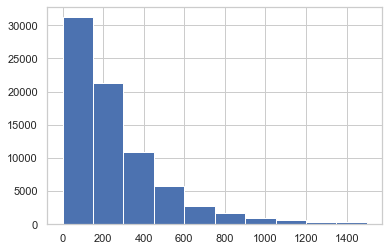

In [61]:
SRD_mod.head()
SRD_hypo_blocked_driveeway= SRD_mod[SRD_mod['Complaint Type']== 'Blocked Driveway']['Request_Closing_Time_mins']
SRD_hypo_blocked_driveeway.hist(range=(0,1500)) 

#### The data is left skewed, needs to be converted to gaussian

<AxesSubplot:>

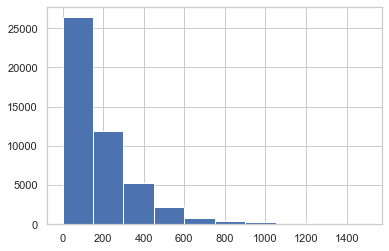

In [62]:

SRD_hypo_noice_street= SRD_mod[SRD_mod['Complaint Type']== 'Noise - Street/Sidewalk']['Request_Closing_Time_mins']
SRD_hypo_noice_street.hist(range=(0,1500)) 

In [63]:
 # Simiar result
 # Applying log transformation
dataset_log_transformed={}
for i in SRD_mod['Complaint Type'].unique():
    dataset_log_transformed[i]= np.log(SRD_mod[SRD_mod['Complaint Type']==i]['Request_Closing_Time_mins'])

In [64]:
dataset_log_transformed.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Bike/Roller/Skate Chronic', 'Panhandling', 'Noise - Park', 'Homeless Encampment', 'Urinating in Public', 'Graffiti', 'Disorderly Youth', 'Illegal Fireworks', 'Ferry Complaint', 'Agency Issues', 'Squeegee', 'Animal in a Park'])

<AxesSubplot:>

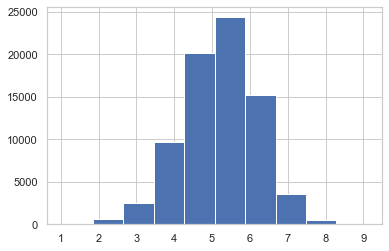

In [65]:
dataset_log_transformed['Blocked Driveway'].hist()

<AxesSubplot:>

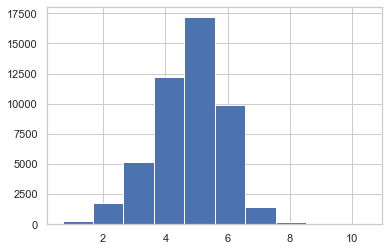

In [66]:
dataset_log_transformed['Noise - Street/Sidewalk'].hist()

#### ANOVA Analysis (Checking for top 5 complaints)
- 1. Null Hypothesis: The average response time across complaint types is not different
- 2.  Alternate Hypothesis: The average response time across complaint types is different

In [75]:
#Perform one-way ANOVA.
#The one-way ANOVA tests the null hypothesis that two or more groups have the same population mean. The test is applied to samples from two or more groups, 
# possibly with differing sizes.

from scipy.stats import f_oneway
stat,p = f_oneway(dataset_log_transformed['Noise - Street/Sidewalk'], dataset_log_transformed['Blocked Driveway'], dataset_log_transformed['Illegal Parking'], 
                   dataset_log_transformed['Derelict Vehicle'], dataset_log_transformed['Noise - Commercial'])

alpha=0.05
if p>0.05:
    print('Null Hypothesis is accepted')
else:
    print('Null hypothesis is rejected')

Null hypothesis is rejected


 - Are the type of complaint or service requested and location related?

In [68]:
print('Null data in Complaint Type =',SRD_mod['Complaint Type'].isnull().sum())
print('Null data in City =',SRD_mod['City'].isnull().sum())

Null data in Complaint Type = 0
Null data in City = 2614


In [69]:
df_cc = SRD_mod[['Complaint Type','City']]
df_cc = df_cc.dropna()
#df_cc.isnull().sum()
#df_cc

In [70]:
City_Complaint = pd.crosstab(SRD_mod['Complaint Type'],SRD_mod['City'],margins=True, margins_name='Total')
#City_Complaint = pd.crosstab(df_cc['Complaint Type'],df_cc['City'])
City_Complaint.head(6)

City,ARVERNE,ASTORIA,Astoria,BAYSIDE,BELLEROSE,BREEZY POINT,BRONX,BROOKLYN,CAMBRIA HEIGHTS,CENTRAL PARK,COLLEGE POINT,CORONA,EAST ELMHURST,ELMHURST,East Elmhurst,FAR ROCKAWAY,FLORAL PARK,FLUSHING,FOREST HILLS,FRESH MEADOWS,GLEN OAKS,HOLLIS,HOWARD BEACH,Howard Beach,JACKSON HEIGHTS,JAMAICA,KEW GARDENS,LITTLE NECK,LONG ISLAND CITY,Long Island City,MASPETH,MIDDLE VILLAGE,NEW HYDE PARK,NEW YORK,OAKLAND GARDENS,OZONE PARK,QUEENS,QUEENS VILLAGE,REGO PARK,RICHMOND HILL,RIDGEWOOD,ROCKAWAY PARK,ROSEDALE,SAINT ALBANS,SOUTH OZONE PARK,SOUTH RICHMOND HILL,SPRINGFIELD GARDENS,STATEN ISLAND,SUNNYSIDE,WHITESTONE,WOODHAVEN,WOODSIDE,Woodside,Total
Complaint Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Animal Abuse,38,125,0,37,7,2,1415,2394,11,0,28,61,59,38,0,89,2,143,45,45,5,33,31,0,42,229,19,15,30,0,36,22,1,1525,19,48,0,66,26,32,117,30,33,30,55,26,24,557,35,28,45,69,0,7767
Animal in a Park,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
Bike/Roller/Skate Chronic,0,15,0,0,1,0,20,111,0,0,0,0,1,2,0,0,0,3,5,0,0,0,1,0,2,2,0,0,3,0,1,1,0,225,2,1,0,0,0,0,3,0,2,0,1,1,0,7,2,4,2,4,0,422
Blocked Driveway,35,2618,116,377,95,3,12755,28148,147,0,435,2761,1408,1446,0,284,20,2795,663,503,30,342,167,1,568,2818,313,121,772,34,732,457,53,2072,132,1259,2,585,611,872,1694,70,211,244,942,1548,262,2142,206,208,1060,1613,11,76761
Derelict Vehicle,27,351,12,198,89,3,1953,5181,115,0,184,57,113,78,1,187,56,440,52,291,49,143,138,0,29,954,14,61,195,4,434,296,14,537,86,420,1,370,81,167,330,9,208,202,358,289,210,1766,10,227,308,247,2,17547
Disorderly Youth,2,3,0,1,2,0,63,72,0,0,1,6,1,2,0,1,1,2,1,0,0,1,1,0,0,8,0,2,1,0,2,0,0,69,1,4,0,0,0,0,3,4,0,1,2,2,0,23,2,1,0,1,0,286


Applying the ANOVA for a few combinations and let's see how does it go?

In [104]:
import scipy.stats as stat
print("For 'ARVERNE' and 'ASTORIA' pair -------")
f_val,p_val = stat.f_oneway(City_Complaint['ARVERNE'],City_Complaint['ASTORIA'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

For 'ARVERNE' and 'ASTORIA' pair -------
F-statistic is = 3.3097701947747975
p value is = 0.08


In [77]:

print("For 'ARVERNE' and 'BROOKLYN' pair -------")
f_val,p_val = stat.f_oneway(City_Complaint['ARVERNE'],City_Complaint['BROOKLYN'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

For 'ARVERNE' and 'BROOKLYN' pair -------
F-statistic is = 3.716772993046823
p value is = 0.06


In [78]:
print("For 'HOLLIS' and 'JAMAICA' pair -------")
f_val,p_val = stat.f_oneway(City_Complaint['HOLLIS'],City_Complaint['JAMAICA'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

For 'HOLLIS' and 'JAMAICA' pair -------
F-statistic is = 2.666621070410633
p value is = 0.11


In [79]:
print("For 'MASPETH' and 'QUEENS' pair -------")
f_val,p_val = stat.f_oneway(City_Complaint['MASPETH'],City_Complaint['QUEENS'])
print('F-statistic is =',f_val)
print('p value is =',np.around(p_val,decimals=2))

For 'MASPETH' and 'QUEENS' pair -------
F-statistic is = 3.368313812374042
p value is = 0.07


We have seen a few of the pairs. And it seems p-value is around 0.05. This is a very insufficient number of pair checking. So, though it looks like 'neglecting Null Hypothesis', but we can not certain unless checking all pairs ($^{53}{C}_{2}$ combinations for 53 cities). Even for 21 complaint types, it is still $^{21}{C}_{2}$ combinations.

It is more proper to use the chi square contingency test for such data structure. It gives us the correlation between different features (here different cities for a given complaint type).

 - Null Hypothesis states - there is no dependence or relation among the features
 - Alternate Hypothesis states - there is a relation among the features

#### Chi square Contigency test 

In [ ]:
chai2, p_val, df, exp_frq = stat.chi2_contingency(City_Complaint)

In [ ]:
print('Chai square value =',chai2)
print('p-value is =',p_val)

Chai square value = 119769.34666374495
p-value is = 0.0


In [ ]:
if (p_val<0.05):
    print('Null hypothesis is rejected since p value ({}) is less than 0.05'.format(np.around(p_val,decimals=2)))
else:
    print('Null hypothesis is accepted since p value ({}) is greater than 0.05'.format(np.around(p_val,decimals=2)))

Null hypothesis is rejected since p value (0.0) is less than 0.05


Thus we may conclude that there is a relationship between the type of complaint or service requested and location.

In [105]:
### Method 2: Pearson Correlation Method

In [106]:
df_corr_pearson= SRD_mod[['Complaint Type','Location','Latitude','Longitude','City','Borough']]
df_corr_pearson.head(10)

,Complaint Type,Location,Latitude,Longitude,City,Borough
0,Noise - Street/Sidewalk,"(40.86568153633767, -73.92350095571744)",40.865682,-73.923501,NEW YORK,MANHATTAN
1,Blocked Driveway,"(40.775945312321085, -73.91509393898605)",40.775945,-73.915094,ASTORIA,QUEENS
2,Blocked Driveway,"(40.870324522111424, -73.88852464418646)",40.870325,-73.888525,BRONX,BRONX
3,Illegal Parking,"(40.83599404683083, -73.82837939584206)",40.835994,-73.828379,BRONX,BRONX
4,Illegal Parking,"(40.733059618956815, -73.87416975810375)",40.733060,-73.874170,ELMHURST,QUEENS
5,Illegal Parking,"(40.66082272389114, -73.99256786342693)",40.660823,-73.992568,BROOKLYN,BROOKLYN
6,Illegal Parking,"(40.840847591440415, -73.9373750864581)",40.840848,-73.937375,NEW YORK,MANHATTAN
7,Blocked Driveway,"(40.83750262540012, -73.90290517326568)",40.837503,-73.902905,BRONX,BRONX
8,Illegal Parking,"(40.704977164399935, -73.8326047502584)",40.704977,-73.832605,KEW GARDENS,QUEENS
9,Blocked Driveway,"(40.623793065806524, -73.99953890121567)",40.623793,-73.999539,BROOKLYN,BROOKLYN


In [107]:
#https://stackoverflow.com/questions/51102205/how-to-know-the-labels-assigned-by-astypecategory-cat-codes
df_corr_pearson['Complaint Type']=df_corr_pearson['Complaint Type'].astype('category').cat.codes
df_corr_pearson['City']= df_corr_pearson['City'].astype('category').cat.codes
df_corr_pearson['Borough']= df_corr_pearson['Borough'].astype('category').cat.codes
df_corr_pearson.head()

C:\Users\grkum\AppData\Local\Temp/ipykernel_30584/1886232764.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr_pearson['Complaint Type']=df_corr_pearson['Complaint Type'].astype('category').cat.codes
C:\Users\grkum\AppData\Local\Temp/ipykernel_30584/1886232764.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_corr_pearson['City']= df_corr_pearson['City'].astype('category').cat.codes
C:\Users\grkum\AppData\Local\Temp/ipykernel_30584/1886232764.py:4: SettingWithCopyWarning: 
A value is trying t

,Complaint Type,Location,Latitude,Longitude,City,Borough
0,16,"(40.86568153633767, -73.92350095571744)",40.865682,-73.923501,33,2
1,4,"(40.775945312321085, -73.91509393898605)",40.775945,-73.915094,1,3
2,4,"(40.870324522111424, -73.88852464418646)",40.870325,-73.888525,6,0
3,12,"(40.83599404683083, -73.82837939584206)",40.835994,-73.828379,6,0
4,12,"(40.733059618956815, -73.87416975810375)",40.733060,-73.874170,13,3


In [108]:
df_corr_pearson.corr(method='pearson')

,Complaint Type,Latitude,Longitude,City,Borough
Complaint Type,1.000000,0.150197,-0.184391,0.091711,-0.057730
Latitude,0.150197,1.000000,0.364966,-0.000571,-0.249501
Longitude,-0.184391,0.364966,1.000000,-0.123933,0.021277
City,0.091711,-0.000571,-0.123933,1.000000,0.654637
Borough,-0.057730,-0.249501,0.021277,0.654637,1.000000


#### From the first line it can be seen that the complaint types has little correlation with the location